In [50]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 
from utils import my_histogram, pca_results

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

ImportError: cannot import name 'pca_results' from 'utils' (/Users/youngjun/Jun/projects/european_soccer_match_prediction/src/utils.py)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_player = pd.read_csv("../data/df_player.csv")
df_player

,player_api_id,player_name,birthday,height,weight,player_measured_date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,position_X_mode,position_Y_mode,position_role
0,505942,Aaron Appindangoye,1992-02-29,182.88,187,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,6.0,3.0,defender
1,505942,Aaron Appindangoye,1992-02-29,182.88,187,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,6.0,3.0,defender
2,505942,Aaron Appindangoye,1992-02-29,182.88,187,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,6.0,3.0,defender
3,505942,Aaron Appindangoye,1992-02-29,182.88,187,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,6.0,3.0,defender
4,505942,Aaron Appindangoye,1992-02-29,182.88,187,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,6.0,3.0,defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,2009-08-30,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,5.0,9.0,forward
183974,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,2009-02-22,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,5.0,9.0,forward
183975,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,2008-08-30,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,5.0,9.0,forward
183976,39902,Zvjezdan Misimovic,1982-06-05,180.34,176,2007-08-30,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,5.0,9.0,forward


In [7]:
player_num_attr = ["player_api_id", "player_measured_date", "height", "weight",
                   'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy',
                   'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                   'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 
                   'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
                   'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                   'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
                   'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes']

In [8]:
df_player_num_attr = df_player[player_num_attr]

# 1. Missing values

<AxesSubplot:>

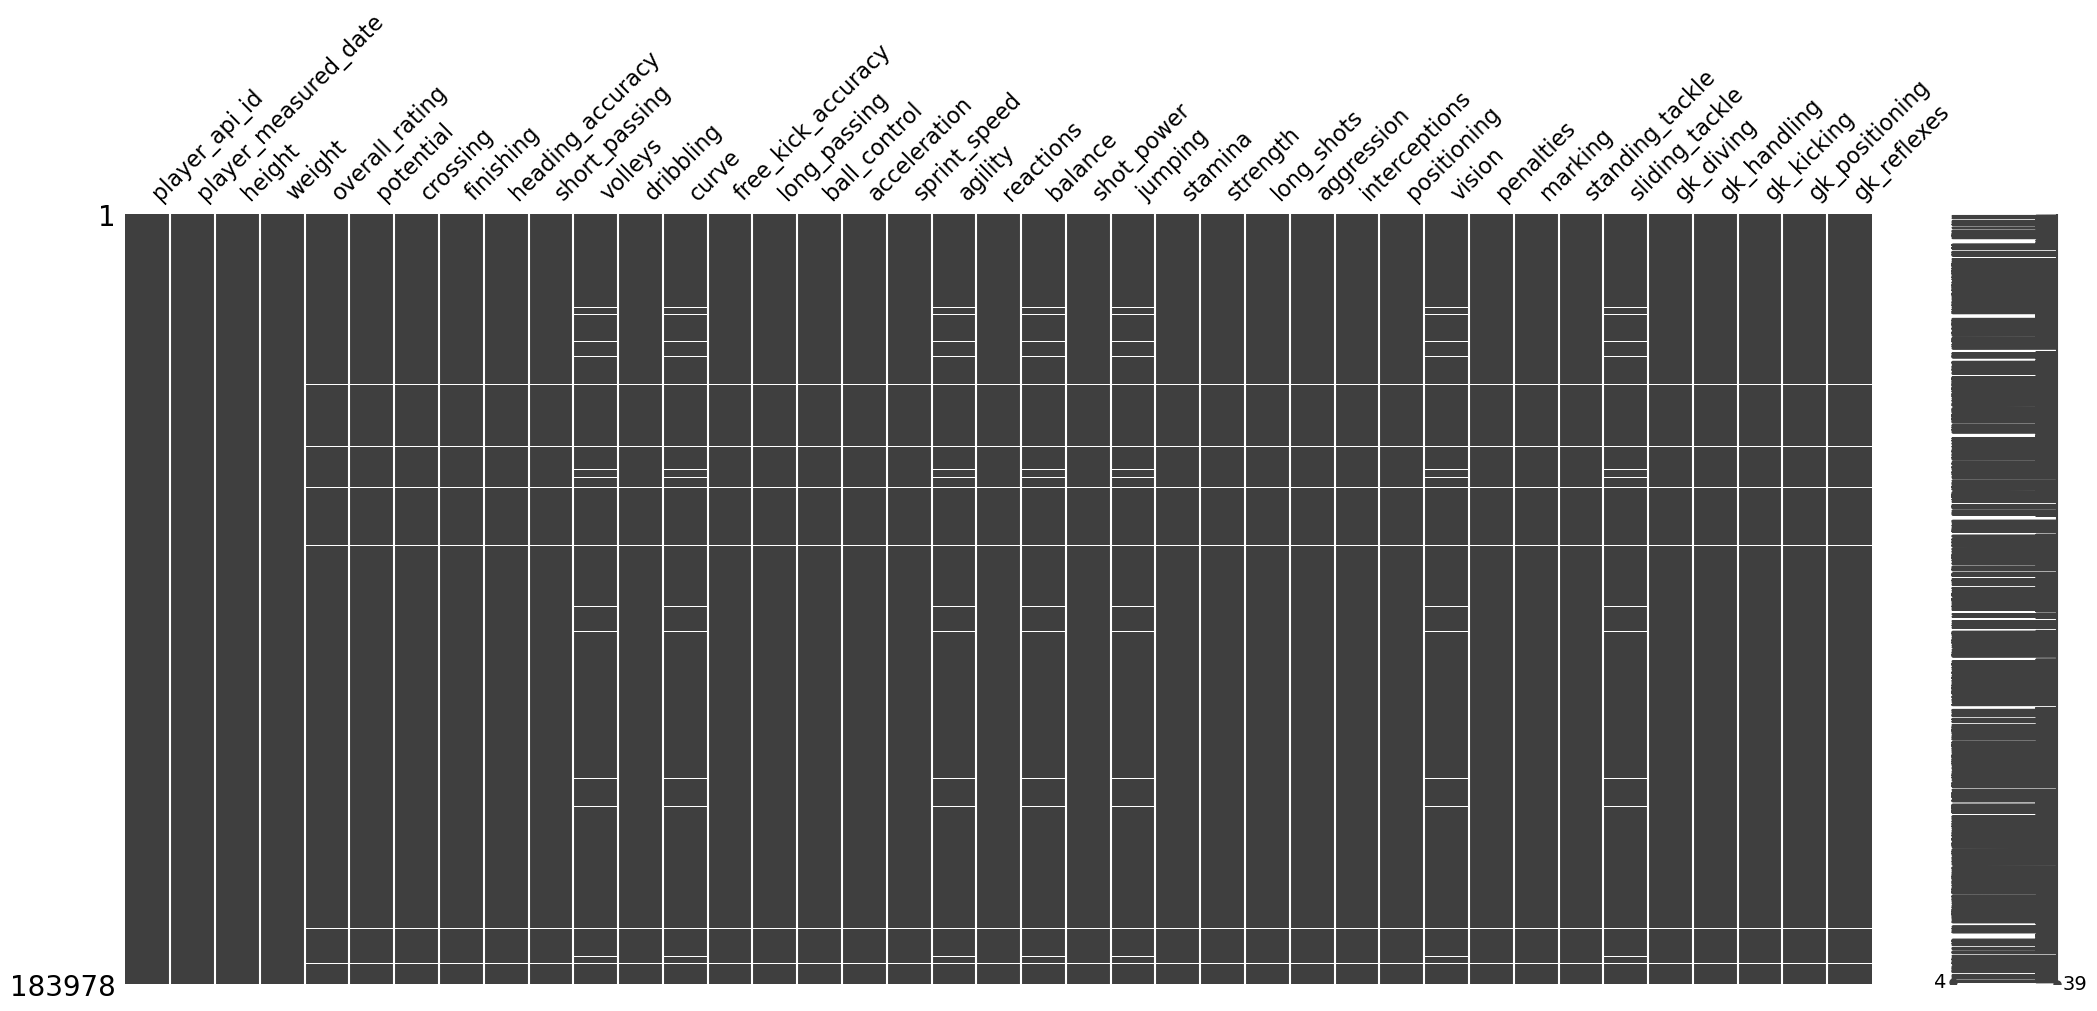

In [9]:
msno.matrix(df_player_num_attr)

- If overall_rating is missing, all other attributes are also msissing.

In [10]:
df_player_num_attr.overall_rating.isna().sum()

836

- There are only 836 cases that overall_rating and all other attributes are missing.

In [12]:
len(df_player_num_attr[~df_player_num_attr.overall_rating.isna()].player_api_id.unique())

11060

- Also, even if we drop the cases that overall_rating is missing, we can check that each player's attributes have been measured at least once.
- So let's just drop the cases that overall_rating is missing.

In [13]:
df_player_num_attr = df_player_num_attr[~df_player_num_attr.overall_rating.isna()]

<AxesSubplot:>

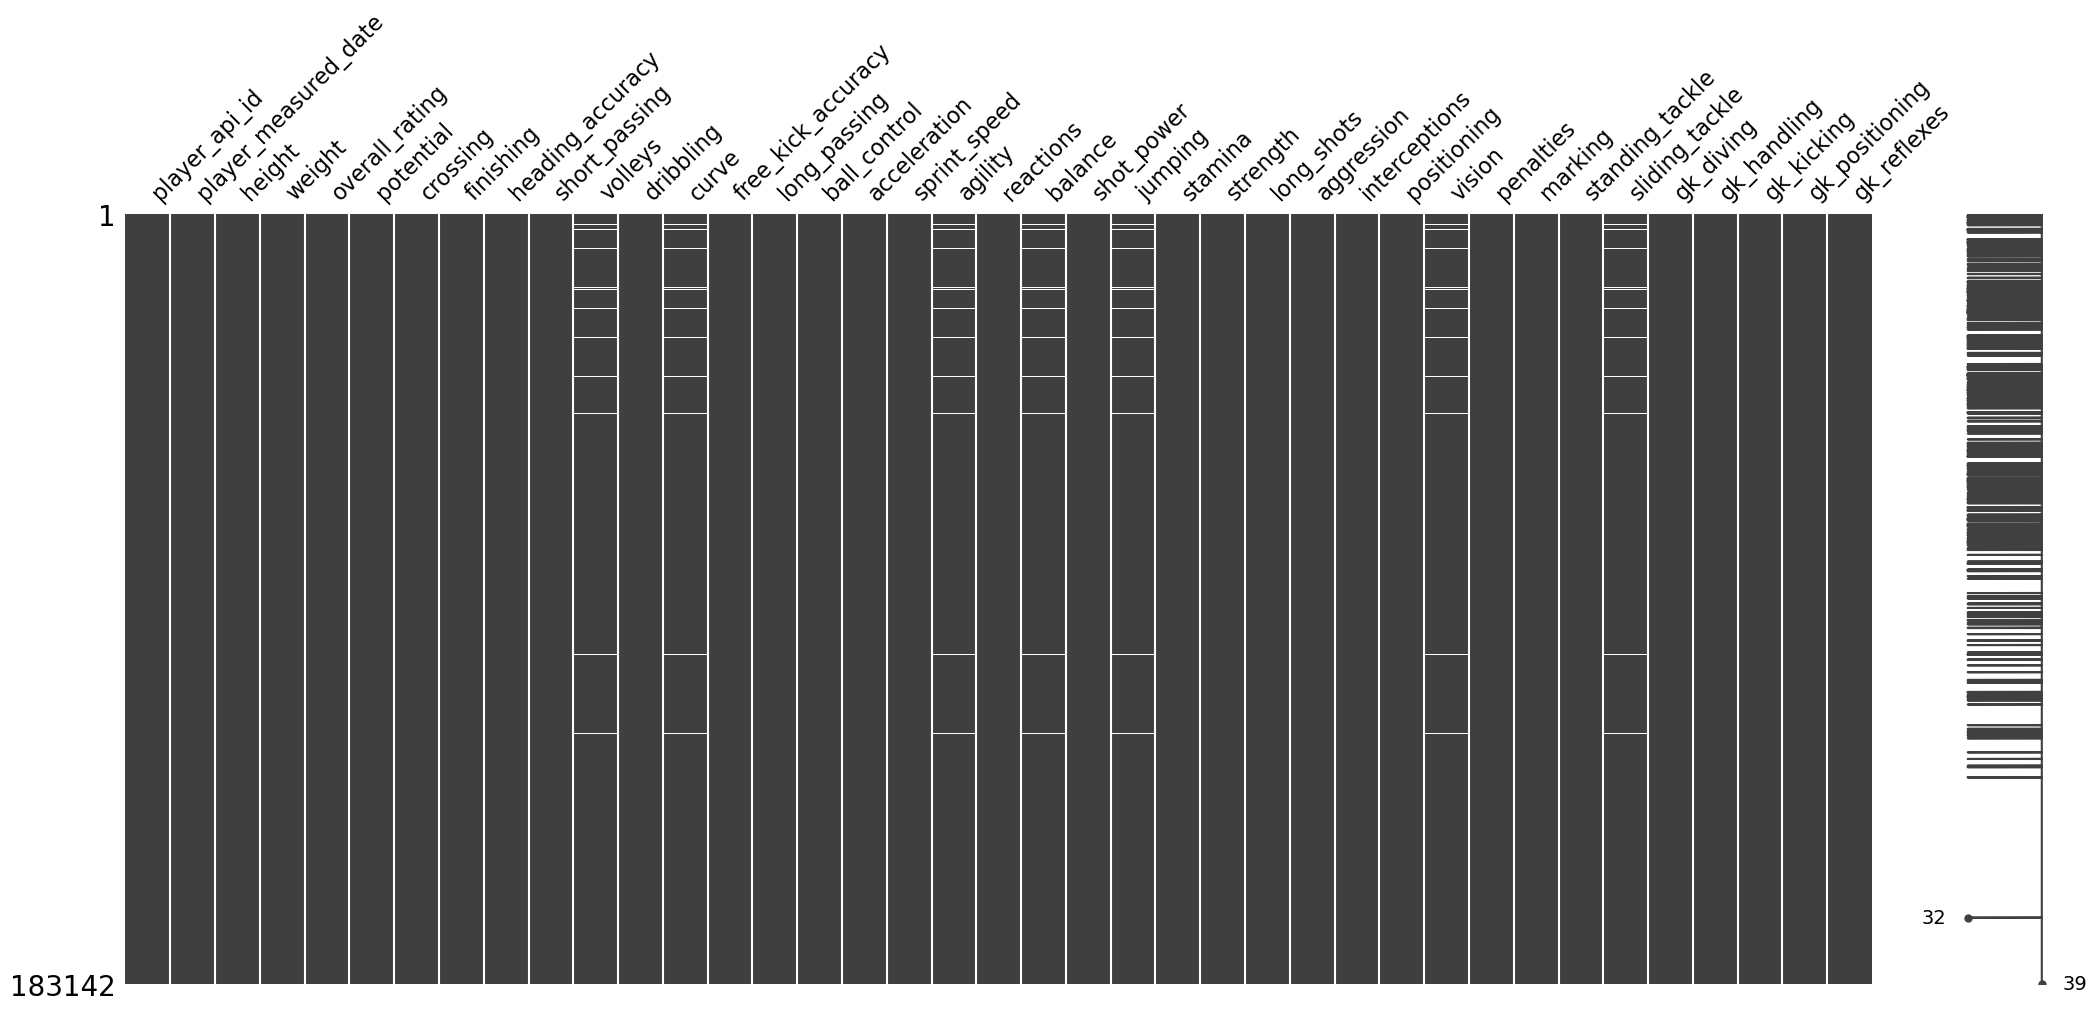

In [15]:
msno.matrix(df_player_num_attr.sort_values(["player_api_id", "player_measured_date"]))

In [16]:
df_player_num_attr.isna().sum()[df_player_num_attr.isna().sum() > 0]

volleys           1877
curve             1877
agility           1877
balance           1877
jumping           1877
vision            1877
sliding_tackle    1877
dtype: int64

- There are some missing values in voleys, curve, agility, balance, jumping, vision, sliding_tackle variables.
- Let's check the correlation between attributes to check whether missing values ​​can be imputed by other variables.

<AxesSubplot:>

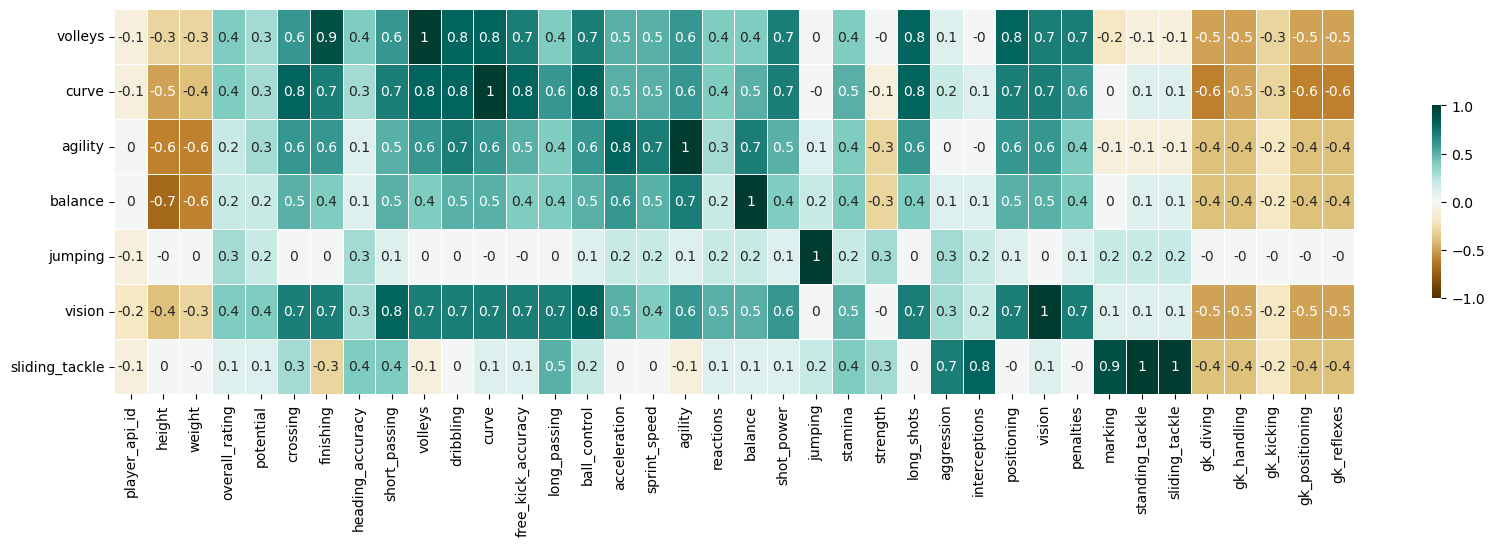

In [17]:
plt.figure(figsize = (20, 5))

corr = round(df_player_num_attr[player_num_attr].corr(), 1)
corr = corr.loc[["volleys", "curve", "agility", "balance", "jumping", "vision", "sliding_tackle"], :]

sns.heatmap(corr, annot = True, cmap = "BrBG", vmin = -1, vmax = 1, 
            linewidths = 0.5, cbar_kws = {"shrink" : 0.5})


- We can see that there are absolute correlations over 0.7 between:
    - volleys: finishing, dribbling, curve, positioning, long_shots, dribbling, positioning, curve, ball_control, shot_power,
                                         penalties
    - curve: dribbling, long_shots, crossing, ball_control, free_kick_accuracy, volleys, short_passing, vision, positioning
    - agility: acceleration, sprint_speed, dribbling
    - balance: agility, height
    - jumping: none
    - vision: ball_control, short_passing, positioning, dribbling, long_shots, curve, free_kick_accuracy, crossing, 
              volleys, long_passing, penalties, finishing
    - sliding_tackle: standing_tackle, marking, interceptions, aggression

- There are plenty of other variables that have high correlation with the variables that have the missing values, except for the balance and jumping.
- So, it seems to be possible to use the iterative imputation for the missing values from the player attributes, except for the balance and jumping.

- However, since only 1%(1877 / 183142) of the data have missing values in banace and jumping columns, let's also use the iterative imputation even for the balance and jumping.

In [20]:
target = df_player_num_attr.set_index(["player_api_id", "player_measured_date"])

index = target.index
col_names = target.columns

imp_player_attr = IterativeImputer(max_iter = 10, random_state = 42)
imp_player_attr.fit(target)
df_player_num_attr_imputed = pd.DataFrame(imp_player_attr.transform(target), 
                                          columns = col_names, index = index)


<AxesSubplot:>

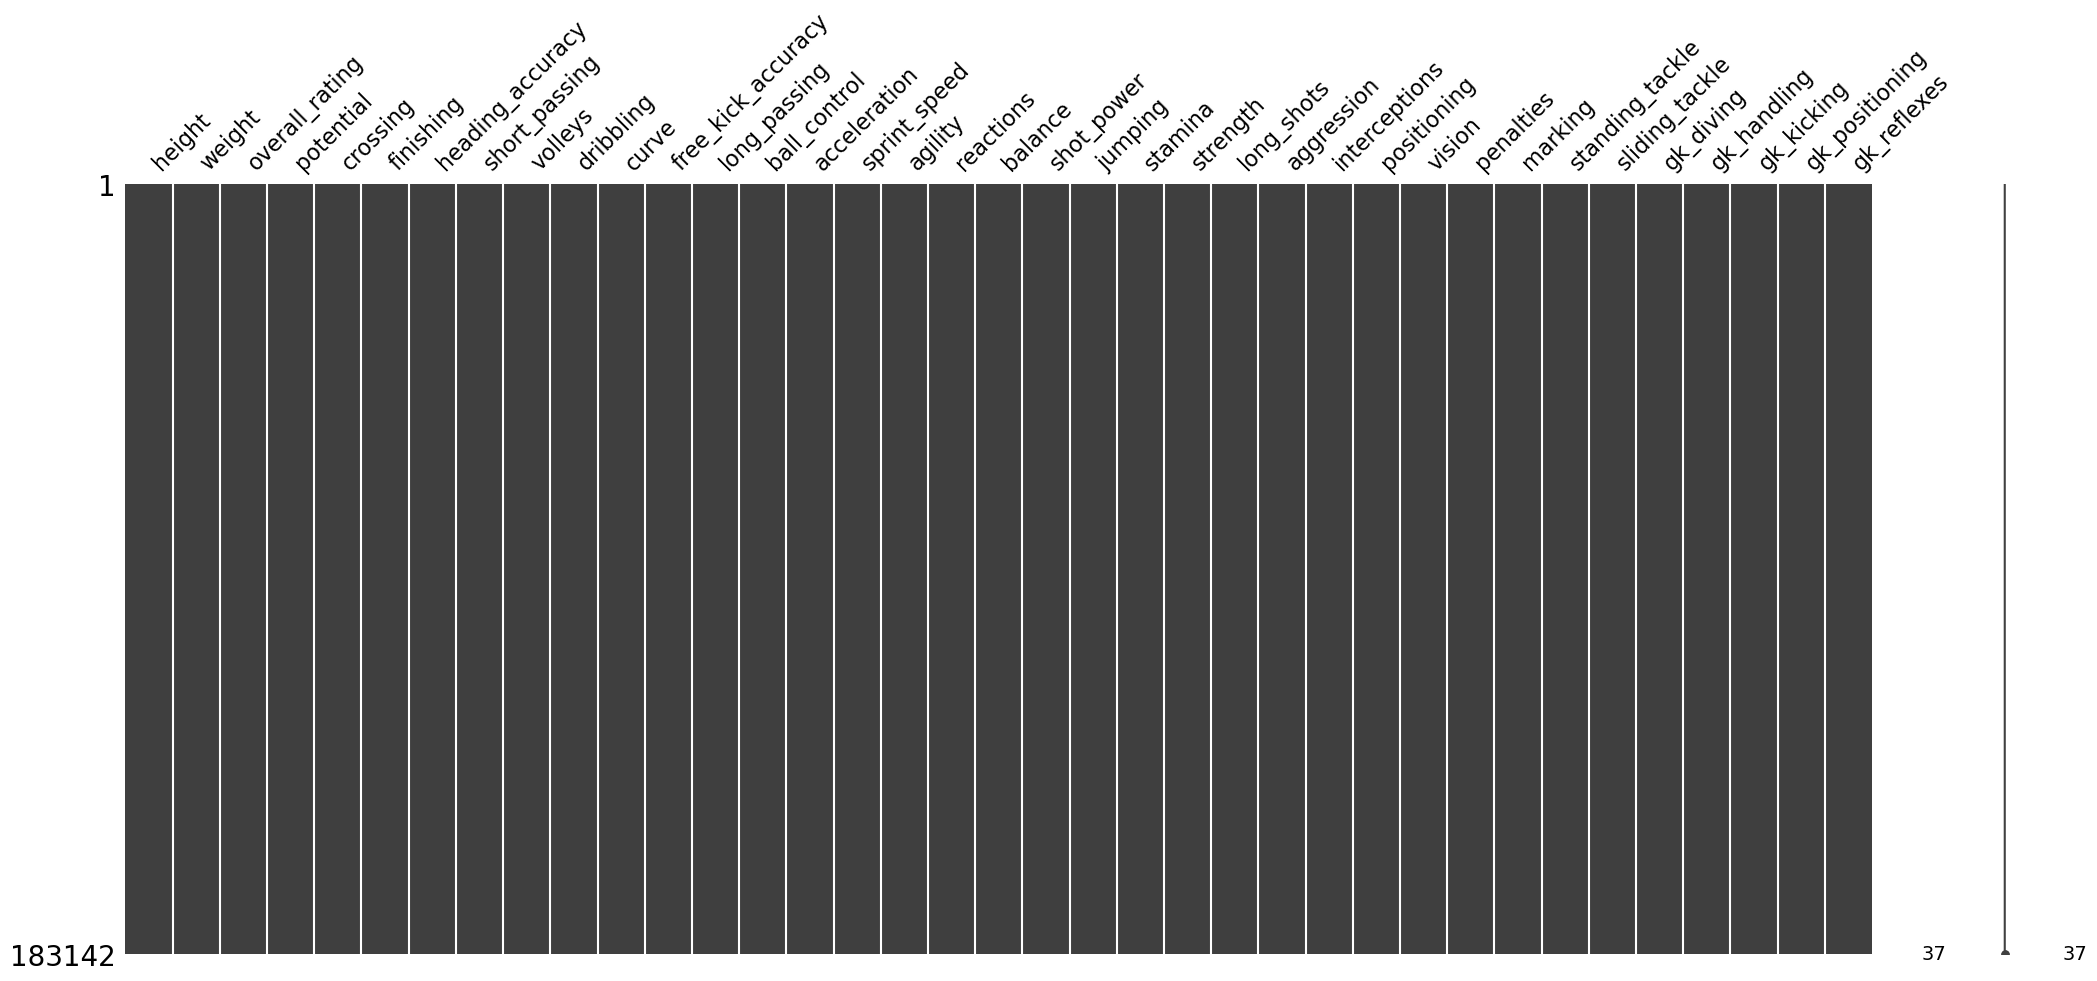

In [21]:
msno.matrix(df_player_num_attr_imputed)

In [24]:
df_player_num_attr_imputed = df_player_num_attr_imputed.reset_index()

In [25]:
df_player_num_attr_imputed

,player_api_id,player_measured_date,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,2016-02-18,182.88,187.0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,2015-11-19,182.88,187.0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,2015-09-21,182.88,187.0,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,2015-03-20,182.88,187.0,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,2007-02-22,182.88,187.0,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183137,39902,2009-08-30,180.34,176.0,83.0,85.0,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183138,39902,2009-02-22,180.34,176.0,78.0,80.0,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183139,39902,2008-08-30,180.34,176.0,77.0,80.0,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183140,39902,2007-08-30,180.34,176.0,78.0,81.0,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


# 2. Dimension reduction by PCA

- In the match data, we have the information of 22 players id from the each team.
- Since we will merge the player attributes to the match data, there are too many columns: 22 players * 35 attributes = 770 columns.

In [26]:
df_player_grouped_num_attr = df_player_num_attr_imputed.drop(["player_measured_date", "height", "weight"], axis = 1).groupby("player_api_id").mean()
df_player_grouped_num_attr

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2625,60.142857,61.142857,50.142857,47.285714,46.285714,56.500000,38.000000,54.142857,50.000000,49.928571,65.571429,59.142857,66.857143,63.285714,66.428571,49.714286,66.214286,66.714286,58.714286,77.285714,55.785714,56.857143,71.285714,62.071429,50.357143,55.285714,61.928571,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571
2752,69.380952,70.380952,36.428571,37.428571,75.333333,54.809524,20.428571,44.857143,30.428571,18.857143,59.571429,55.571429,41.619048,42.190476,43.333333,60.857143,44.571429,57.428571,56.523810,60.904762,82.238095,19.571429,80.285714,71.428571,31.428571,52.428571,35.428571,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238
2768,69.285714,70.571429,42.238095,42.761905,66.666667,64.714286,28.761905,40.238095,51.761905,20.047619,57.000000,56.380952,56.952381,58.904762,58.047619,69.809524,60.190476,38.761905,76.904762,59.285714,67.428571,19.428571,62.761905,74.714286,44.190476,57.761905,31.904762,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238
2770,71.133333,73.533333,61.866667,67.666667,67.800000,72.533333,67.133333,75.066667,79.800000,68.666667,70.266667,76.733333,62.200000,59.800000,62.600000,65.933333,61.266667,68.333333,57.133333,51.000000,62.600000,73.000000,56.800000,44.933333,64.533333,71.600000,63.933333,30.200000,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000
2790,70.200000,75.800000,70.000000,37.400000,55.200000,68.000000,43.000000,60.800000,67.000000,55.400000,69.800000,66.800000,70.800000,71.200000,65.000000,69.200000,67.000000,46.400000,61.000000,70.400000,71.000000,42.400000,68.400000,63.400000,60.600000,60.000000,55.400000,74.600000,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744907,51.909091,65.909091,42.454545,44.454545,47.454545,59.454545,42.454545,56.454545,46.454545,43.454545,58.454545,55.454545,66.000000,64.000000,61.000000,53.454545,74.000000,50.454545,63.000000,54.000000,49.909091,38.454545,36.454545,22.454545,48.454545,51.454545,52.454545,39.454545,48.454545,49.454545,8.454545,13.454545,12.454545,11.454545,8.454545
746419,59.000000,66.000000,55.000000,28.000000,50.000000,35.000000,29.000000,67.000000,37.000000,39.000000,35.000000,55.000000,77.000000,76.000000,70.000000,60.000000,74.000000,29.000000,55.000000,63.000000,46.000000,27.000000,59.000000,53.000000,55.000000,40.000000,43.000000,55.000000,69.000000,62.000000,7.000000,10.000000,7.000000,9.000000,9.000000
748432,58.000000,68.000000,48.000000,26.000000,57.000000,49.000000,24.000000,41.000000,39.000000,20.000000,41.000000,42.000000,64.000000,68.000000,50.000000,48.000000,52.000000,46.000000,68.000000,50.000000,67.000000,25.000000,52.000000,55.000000,38.000000,36.000000,45.000000,63.000000,69.000000,68.000000,8.000000,8.000000,12.000000,12.000000,6.000000


<AxesSubplot:>

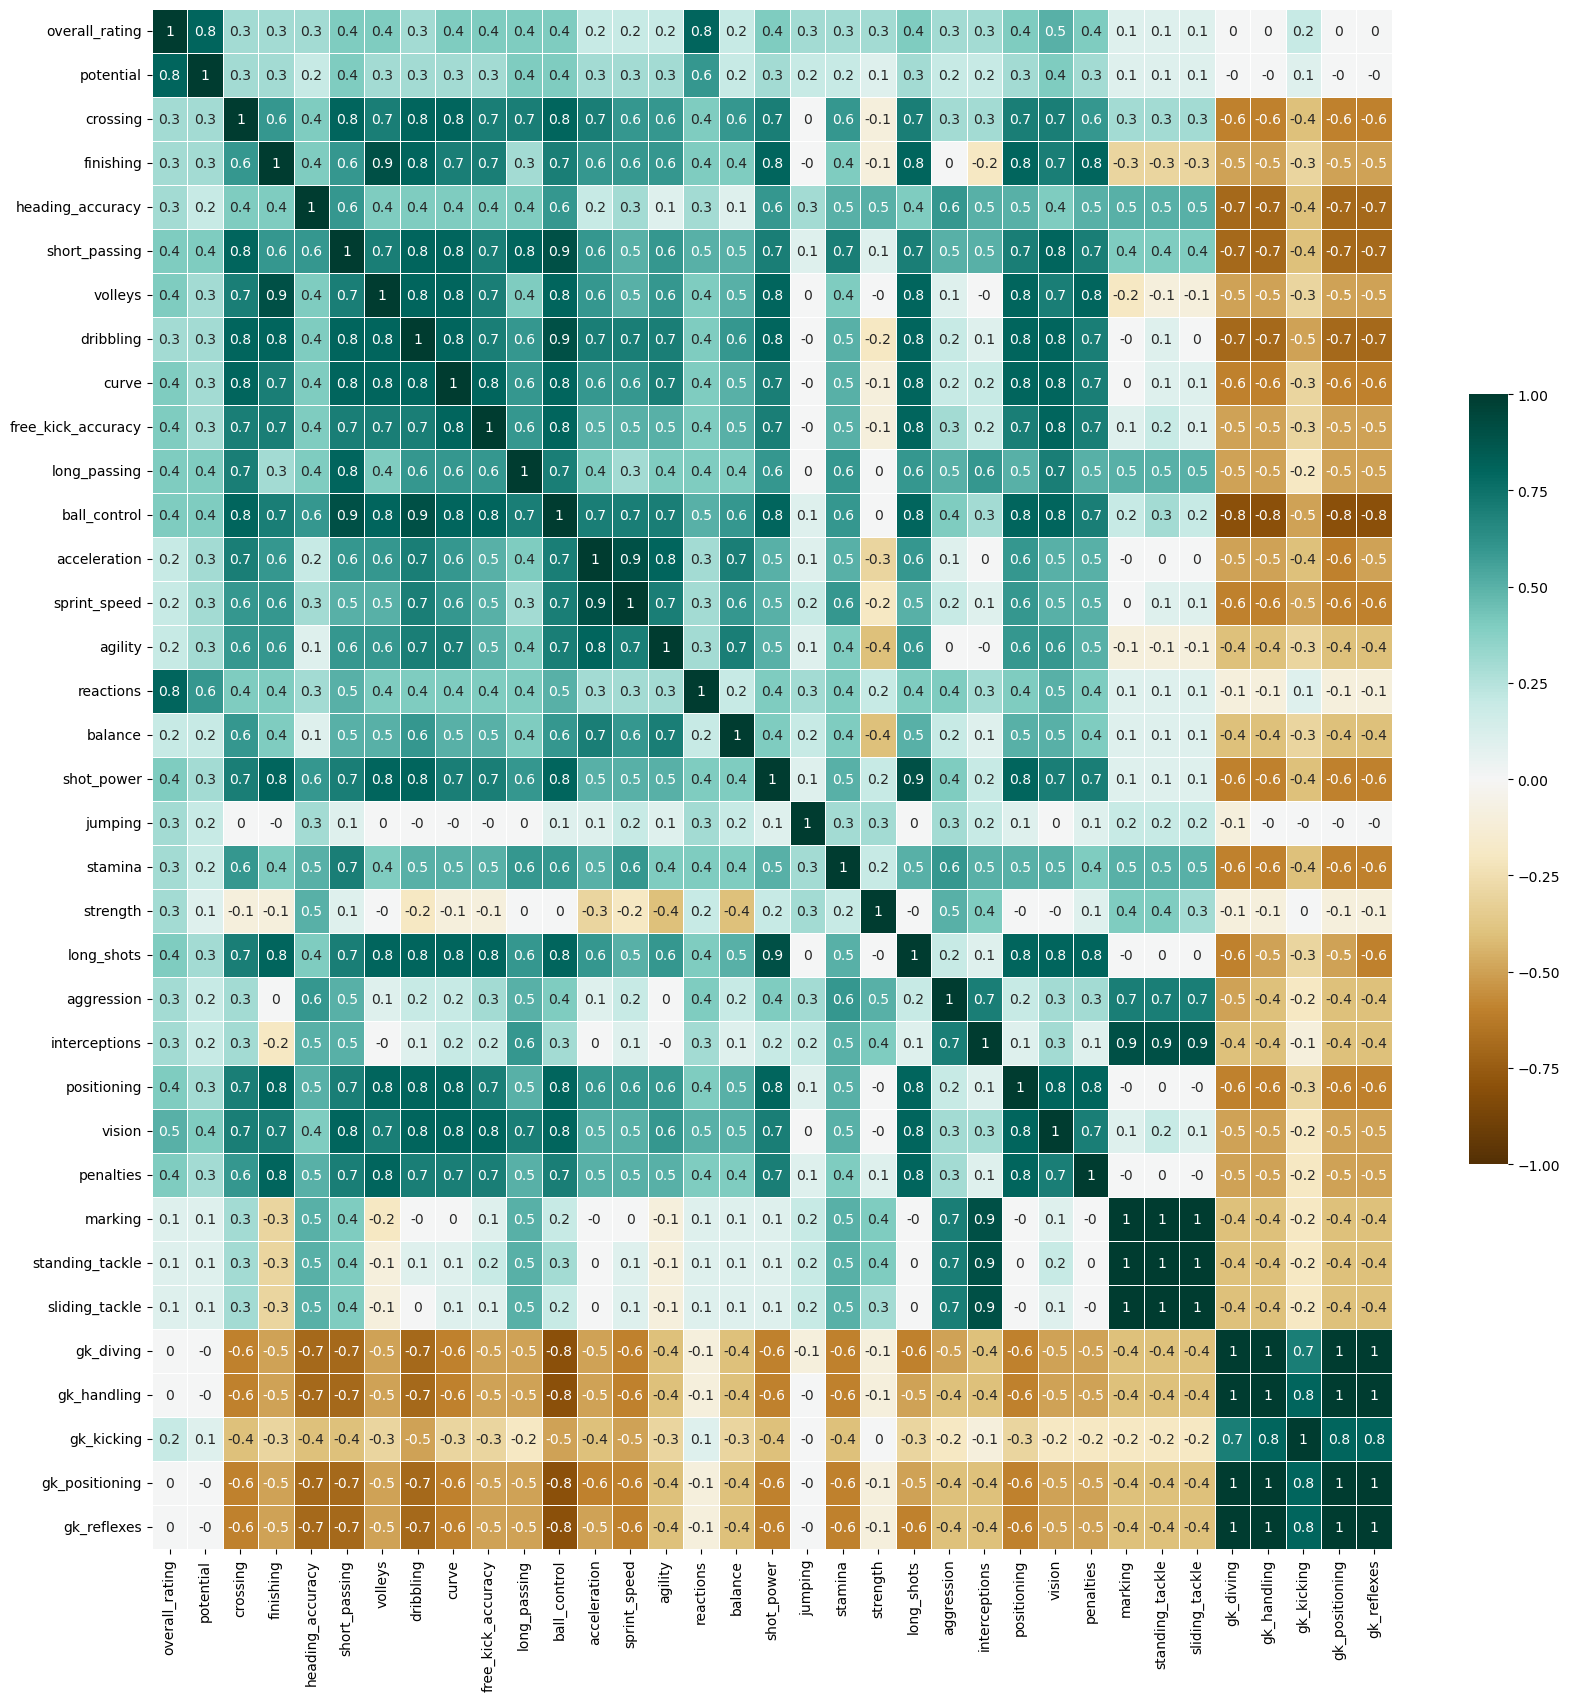

In [27]:
plt.figure(figsize = (20, 20))

corr = round(df_player_grouped_num_attr.corr(), 1)

sns.heatmap(corr, annot = True, cmap = "BrBG", vmin = -1, vmax = 1, 
            linewidths = 0.5, cbar_kws = {"shrink" : 0.5})

- Aslo, correlations between player numerical attributes are very high.
- So, I will use the PCA to reduce the dimension of the numerical player attributes.

- Note that we set the the last season (2015/2016 seasons) as the test set.
- So we will fit the PCA to the only train data and transform all data by fitted PC loadings.

- Check the season start month to exclude the player attributes information measured before the 2015 season.

In [28]:
df_match_basic = pd.read_csv("../data/df_match_basic.csv")

In [31]:
for season in ["2015/2016"]:
    print(f"== Season: {season}")
    print(df_match_basic[df_match_basic.season == season].sort_values("match_date").groupby(["league_id", "season"]).min().match_date)

== Season: 2015/2016
league_id  season   
1          2015/2016    2015-07-24
1729       2015/2016    2015-08-08
4769       2015/2016    2015-08-07
7809       2015/2016    2015-08-14
10257      2015/2016    2015-08-22
13274      2015/2016    2015-08-08
15722      2015/2016    2015-07-17
17642      2015/2016    2015-08-14
19694      2015/2016    2015-08-01
21518      2015/2016    2015-08-21
24558      2015/2016    2015-07-18
Name: match_date, dtype: object


- We can use the player attributes information measured before the 2015-07-17

In [32]:
player_cutoff_date = pd.to_datetime("2015-07-17")
player_cutoff_date

Timestamp('2015-07-17 00:00:00')

In [33]:
df_player_num_attr_imputed

,player_api_id,player_measured_date,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,2016-02-18,182.88,187.0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,2015-11-19,182.88,187.0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,2015-09-21,182.88,187.0,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,2015-03-20,182.88,187.0,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,2007-02-22,182.88,187.0,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183137,39902,2009-08-30,180.34,176.0,83.0,85.0,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183138,39902,2009-02-22,180.34,176.0,78.0,80.0,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183139,39902,2008-08-30,180.34,176.0,77.0,80.0,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183140,39902,2007-08-30,180.34,176.0,78.0,81.0,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [34]:
player_cutoff_bool = pd.to_datetime(df_player_num_attr_imputed.player_measured_date) < player_cutoff_date

In [35]:
df_player_grouped_num_attr = df_player_num_attr_imputed.drop(["player_measured_date", "height", "weight"], axis = 1)[player_cutoff_bool].groupby("player_api_id").mean()
df_player_grouped_num_attr

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2625,60.142857,61.142857,50.142857,47.285714,46.285714,56.500000,38.000000,54.142857,50.000000,49.928571,65.571429,59.142857,66.857143,63.285714,66.428571,49.714286,66.214286,66.714286,58.714286,77.285714,55.785714,56.857143,71.285714,62.071429,50.357143,55.285714,61.928571,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571
2752,69.105263,70.210526,36.157895,37.157895,74.631579,54.368421,20.157895,45.263158,30.157895,18.842105,59.421053,55.421053,42.578947,42.526316,44.315789,60.526316,45.157895,57.157895,56.684211,60.789474,81.947368,19.526316,79.894737,71.473684,31.157895,52.157895,35.157895,71.000000,70.315789,65.421053,11.000000,6.000000,7.000000,9.000000,15.000000
2768,67.562500,69.250000,41.687500,42.062500,65.000000,61.562500,28.062500,39.062500,52.312500,19.437500,56.062500,54.312500,58.687500,60.687500,58.062500,67.562500,59.937500,38.062500,76.250000,64.000000,66.000000,19.250000,62.062500,72.812500,45.500000,57.062500,36.875000,69.812500,68.687500,80.062500,10.375000,16.187500,25.750000,15.500000,12.750000
2770,71.133333,73.533333,61.866667,67.666667,67.800000,72.533333,67.133333,75.066667,79.800000,68.666667,70.266667,76.733333,62.200000,59.800000,62.600000,65.933333,61.266667,68.333333,57.133333,51.000000,62.600000,73.000000,56.800000,44.933333,64.533333,71.600000,63.933333,30.200000,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000
2790,70.200000,75.800000,70.000000,37.400000,55.200000,68.000000,43.000000,60.800000,67.000000,55.400000,69.800000,66.800000,70.800000,71.200000,65.000000,69.200000,67.000000,46.400000,61.000000,70.400000,71.000000,42.400000,68.400000,63.400000,60.600000,60.000000,55.400000,74.600000,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744907,51.000000,65.000000,42.000000,44.000000,47.000000,59.000000,42.000000,56.000000,46.000000,43.000000,58.000000,55.000000,66.000000,64.000000,61.000000,53.000000,74.000000,50.000000,63.000000,54.000000,49.000000,38.000000,36.000000,22.000000,48.000000,51.000000,52.000000,39.000000,48.000000,49.000000,8.000000,13.000000,12.000000,11.000000,8.000000
746419,59.000000,66.000000,55.000000,28.000000,50.000000,35.000000,29.000000,67.000000,37.000000,39.000000,35.000000,55.000000,77.000000,76.000000,70.000000,60.000000,74.000000,29.000000,55.000000,63.000000,46.000000,27.000000,59.000000,53.000000,55.000000,40.000000,43.000000,55.000000,69.000000,62.000000,7.000000,10.000000,7.000000,9.000000,9.000000
748432,58.000000,68.000000,48.000000,26.000000,57.000000,49.000000,24.000000,41.000000,39.000000,20.000000,41.000000,42.000000,64.000000,68.000000,50.000000,48.000000,52.000000,46.000000,68.000000,50.000000,67.000000,25.000000,52.000000,55.000000,38.000000,36.000000,45.000000,63.000000,69.000000,68.000000,8.000000,8.000000,12.000000,12.000000,6.000000


In [37]:
pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components = 10, random_state = 42)),
])

In [38]:
res = pipe.fit_transform(df_player_grouped_num_attr)

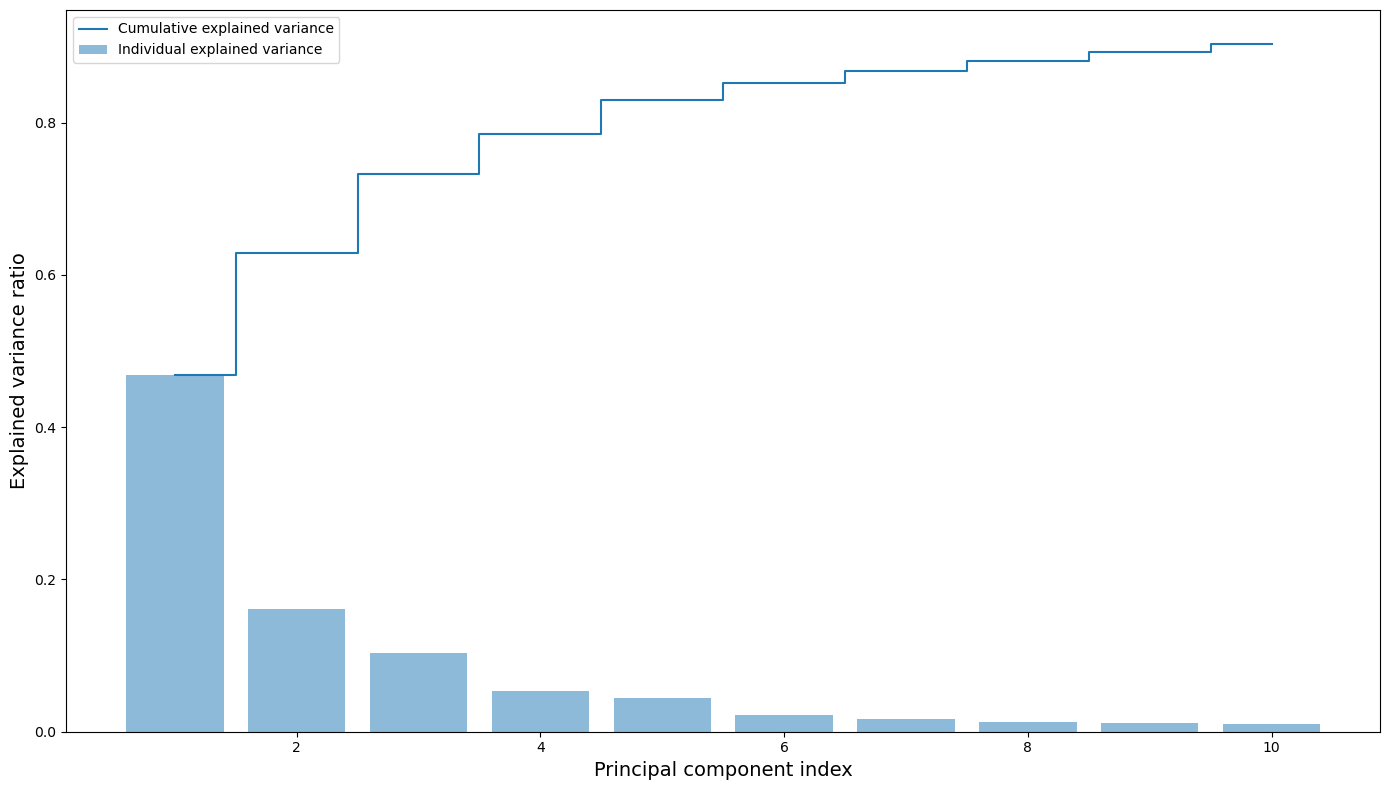

In [44]:
plt.figure(figsize = (14, 8))

plt.bar(range(1,len(pipe.named_steps.pca.explained_variance_ratio_) + 1), pipe.named_steps.pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(np.cumsum(pipe.named_steps.pca.explained_variance_ratio_)) + 1), np.cumsum(pipe.named_steps.pca.explained_variance_ratio_), where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize = 14)
plt.xlabel('Principal component index', fontsize = 14)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

- 5 variables can explain about 80% of the total variance.
- That is, PCA variables can reduce the number of variables without significant loss of information.

- Let's check 5 PC variables.

In [54]:
pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components = 5, random_state = 42)),
])

In [55]:
res = pipe.fit_transform(df_player_grouped_num_attr)

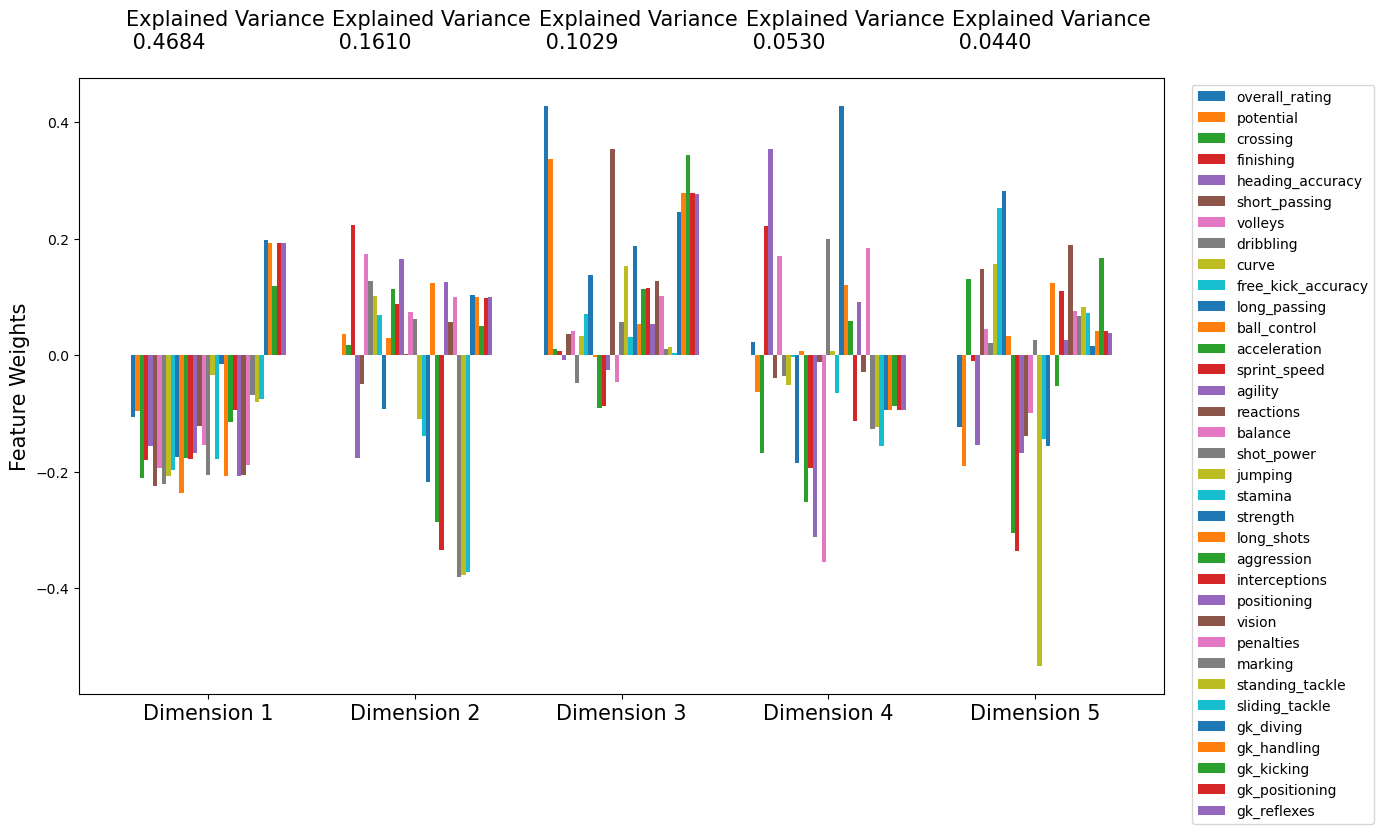

In [56]:
_ = pca_results(df_player_grouped_num_attr, pipe.named_steps.pca)


- Since our goal is to reduce the numerical attributes variables without significant loss of information, let's just use 5 PC variables for each player.
- So for each match, we reduced from 22 players * 35 attributes = 770 columns to 22 players * 5 PC = 110 columns.

In [62]:
cols = df_player_grouped_num_attr.columns.tolist()
cols.append("player_api_id")
cols.append("player_measured_date")

In [65]:
df_player_num_attr_pc  = pipe.fit_transform(df_player_num_attr_imputed[cols].set_index(["player_api_id", "player_measured_date"]))

In [68]:
df_player_num_attr_pc = pd.DataFrame(df_player_num_attr_pc, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"], 
                                     index = df_player_num_attr_imputed[cols].set_index(["player_api_id", "player_measured_date"]).index).reset_index()
df_player_num_attr_pc

,player_api_id,player_measured_date,PC1,PC2,PC3,PC4,PC5
0,505942,2016-02-18,1.046944,2.688259,-1.529901,0.360865,0.548021
1,505942,2015-11-19,1.046944,2.688259,-1.529901,0.360865,0.548021
2,505942,2015-09-21,1.400003,2.036745,-2.359132,0.536742,0.502532
3,505942,2015-03-20,1.615408,1.927571,-2.657865,0.548879,0.399693
4,505942,2007-02-22,1.615408,1.927571,-2.657865,0.548879,0.399693
...,...,...,...,...,...,...,...
183137,39902,2009-08-30,-4.991884,-2.921361,4.090605,0.593824,2.434563
183138,39902,2009-02-22,-3.766452,-2.749777,2.543465,0.492997,2.349990
183139,39902,2008-08-30,-3.745176,-2.589656,2.519182,0.452451,2.349129
183140,39902,2007-08-30,-3.382604,-2.497503,2.251858,0.317332,2.726097


In [69]:
player_num_collected = pd.DataFrame(df_player_num_attr_pc.groupby("player_api_id").count().player_measured_date)
player_num_collected.columns = ["num_collected"]
player_num_collected

,num_collected
player_api_id,
2625,14
2752,21
2768,21
2770,15
2790,5
...,...
744907,11
746419,2
748432,2


In [71]:
df_player_num_attr_pc.groupby("player_api_id").count().player_measured_date.describe()

count    11060.000000
mean        16.558951
std          9.361642
min          2.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         56.000000
Name: player_measured_date, dtype: float64

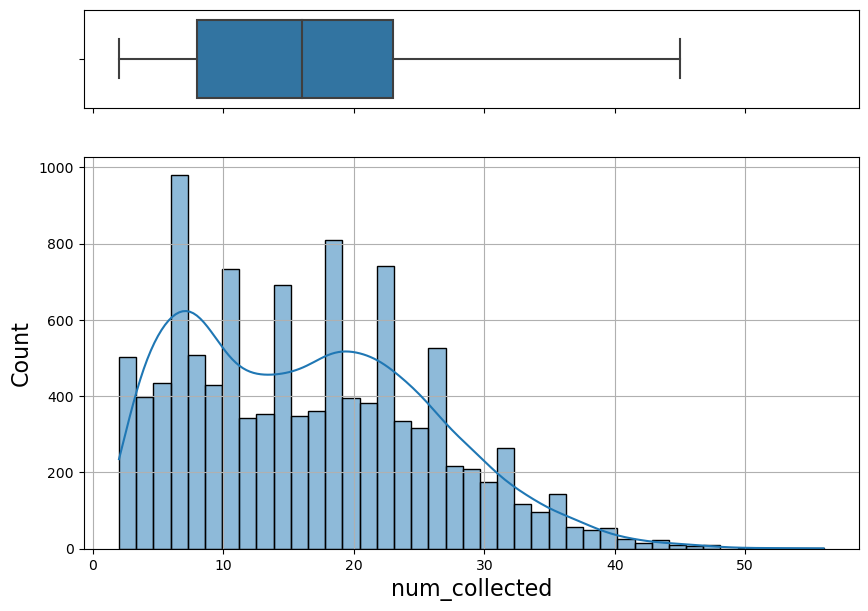

In [72]:
my_histogram(player_num_collected, "num_collected")

- Players' attributes are collected in different days.
- The player's characteristic data was collected 2 times for the fewest players and 56 times for the most players.
- So, we will use player attributes collected closest to match dates.

- Let's merge all starting players' PC variables collected closest to match dates.

In [77]:
df_match_player = pd.read_csv("../data/df_match_player.csv")

In [80]:
df_match_basic[["match_api_id", "match_date"]].merge(df_match_player, how = "left", on = "match_api_id")


,match_api_id,match_date,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,492473,2008-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,492474,2008-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,492475,2008-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,492476,2008-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,492477,2008-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091,2015-09-22,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,42231.0,678384.0,95220.0,638592.0,413155.0,45780.0,171229.0,67333.0,119839.0,143790.0,195215.0,462944.0,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0
25975,1992092,2015-09-23,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,33272.0,41621.0,25813.0,257845.0,114735.0,42237.0,113227.0,358156.0,32343.0,531309.0,37257.0,42276.0,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0
25976,1992093,2015-09-23,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,157856.0,274779.0,177689.0,294256.0,42258.0,39979.0,173936.0,147959.0,451983.0,80564.0,289472.0,10637.0,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0
25977,1992094,2015-09-22,1.0,2.0,4.0,6.0,8.0,3.0,7.0,5.0,3.0,5.0,7.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0

In [81]:
df_match_lineup = df_match_basic[["match_api_id", "match_date"]].merge(df_match_player, how = "left", on = "match_api_id") \
                                [["match_date", "match_api_id",
                                  "home_player_1", "home_player_2", "home_player_3", "home_player_4", 
                                  "home_player_5", "home_player_6", "home_player_7", "home_player_8",
                                  "home_player_9", "home_player_10", "home_player_11", 
                                  "away_player_1", "away_player_2", "away_player_3", "away_player_4", 
                                  "away_player_5", "away_player_6", "away_player_7", "away_player_8",
                                  "away_player_9", "away_player_10", "away_player_11"]]

<AxesSubplot:>

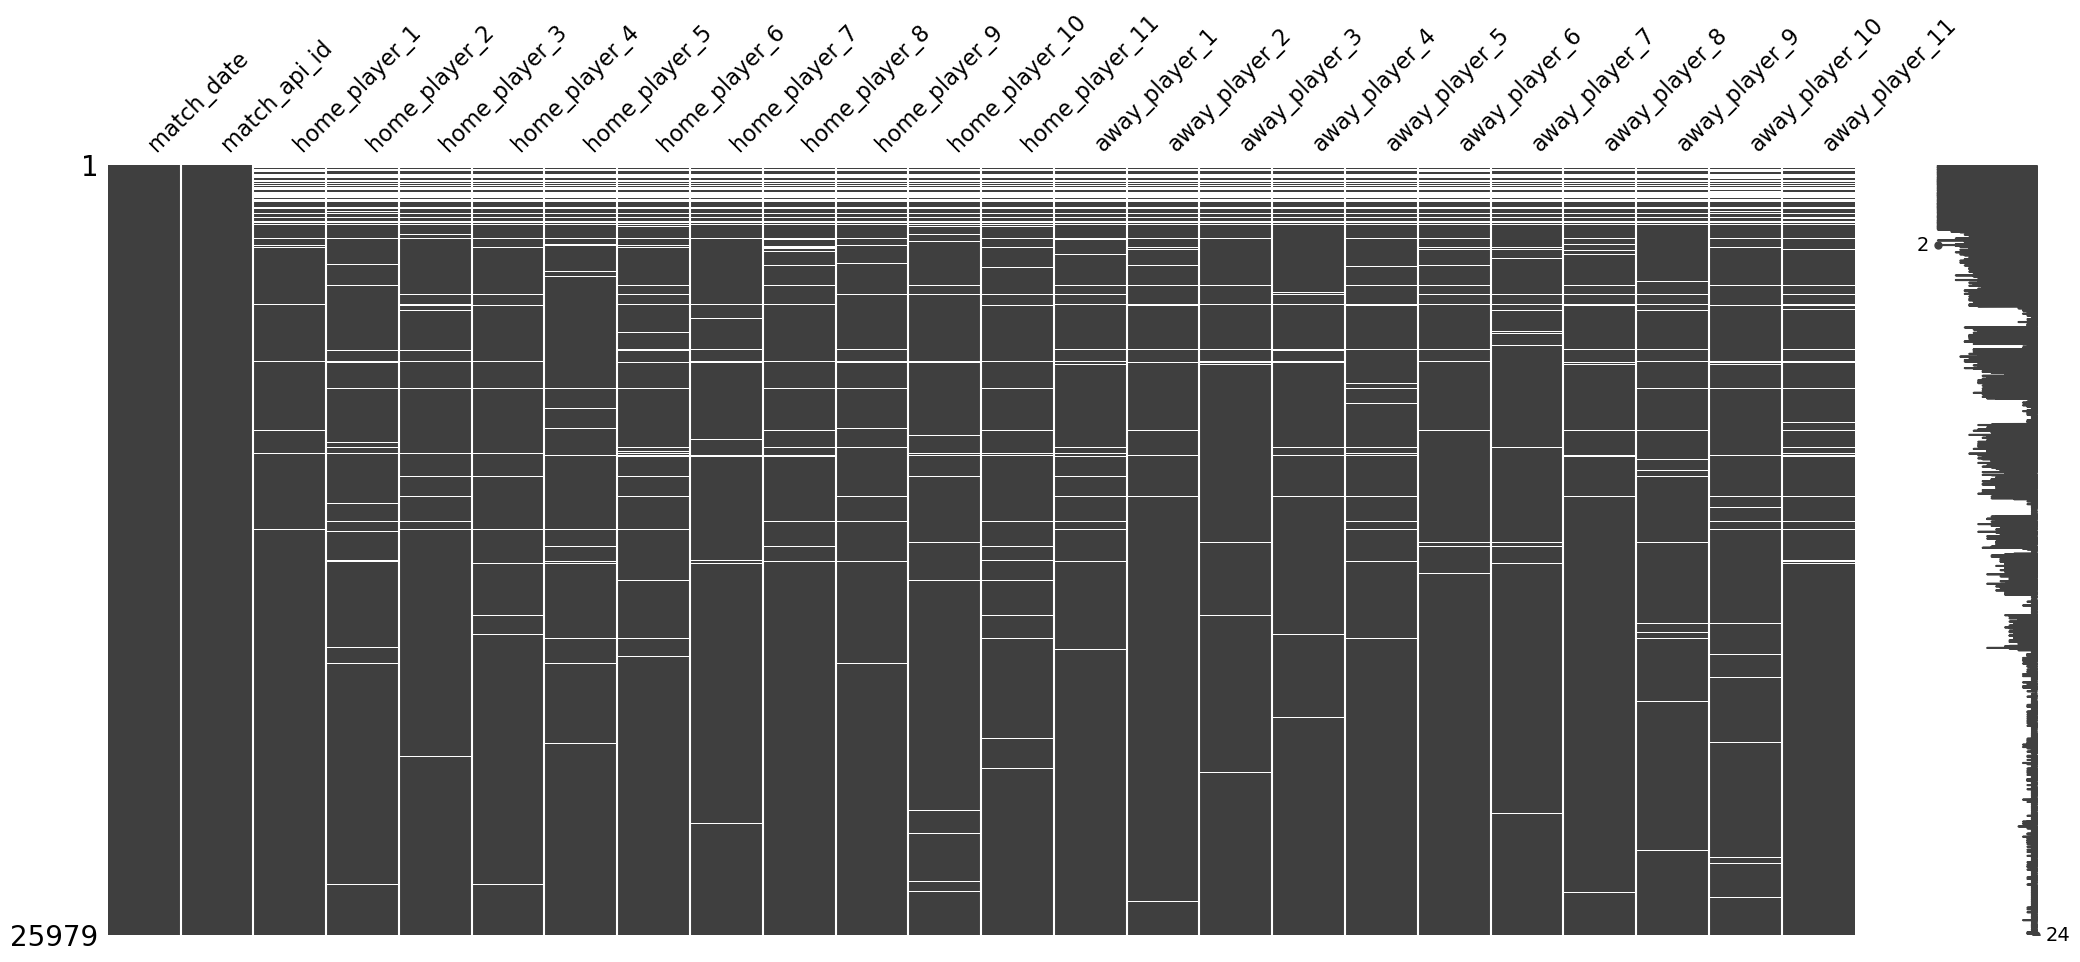

In [83]:
msno.matrix(df_match_lineup.sort_values("match_date"))

- If there is at least one missing value in the starting lineup, let's exclude the match from the analysis.

In [84]:
df_match_lineup = df_match_lineup.dropna()

In [85]:
df_match_lineup.shape

(21374, 24)

- Use the pc variables measured closest to the match date for each player.

In [86]:
df_player_num_attr_pc

,player_api_id,player_measured_date,PC1,PC2,PC3,PC4,PC5
0,505942,2016-02-18,1.046944,2.688259,-1.529901,0.360865,0.548021
1,505942,2015-11-19,1.046944,2.688259,-1.529901,0.360865,0.548021
2,505942,2015-09-21,1.400003,2.036745,-2.359132,0.536742,0.502532
3,505942,2015-03-20,1.615408,1.927571,-2.657865,0.548879,0.399693
4,505942,2007-02-22,1.615408,1.927571,-2.657865,0.548879,0.399693
...,...,...,...,...,...,...,...
183137,39902,2009-08-30,-4.991884,-2.921361,4.090605,0.593824,2.434563
183138,39902,2009-02-22,-3.766452,-2.749777,2.543465,0.492997,2.349990
183139,39902,2008-08-30,-3.745176,-2.589656,2.519182,0.452451,2.349129
183140,39902,2007-08-30,-3.382604,-2.497503,2.251858,0.317332,2.726097


In [88]:
df_match_player_attr_pcs = df_match_lineup[["match_api_id"]]

In [91]:
for i, col in enumerate(["home_player_1", "home_player_2", "home_player_3", "home_player_4", 
                         "home_player_5", "home_player_6", "home_player_7", "home_player_8",
                         "home_player_9", "home_player_10", "home_player_11"]):
    
        merged = df_match_lineup[["match_date", "match_api_id", col]].merge(df_player_num_attr_pc,
                                                                            how = "left", left_on = col,  right_on = "player_api_id") \
                                                                            .sort_values(["player_api_id", "match_date", "player_measured_date"])      
                                                  
        merged["date_diff"] = (pd.to_datetime(merged.player_measured_date) - pd.to_datetime(merged.match_date)).dt.days
        merged = merged[merged.date_diff < 0]
        merged_get_first = merged.sort_values(["player_api_id", "match_date", "date_diff"], ascending = [True, True, False]).groupby(["player_api_id", "match_date"]).first()
        merged_get_first = merged_get_first[["match_api_id", "PC1", "PC2", "PC3", "PC4", "PC5"]].rename(columns = {"PC1": f"home_player_{i + 1}_pc_1", 
                                                                                                                   "PC2": f"home_player_{i + 1}_pc_2",
                                                                                                                   "PC3": f"home_player_{i + 1}_pc_3",
                                                                                                                   "PC4": f"home_player_{i + 1}_pc_4",
                                                                                                                   "PC5": f"home_player_{i + 1}_pc_5"})
        
        
        df_match_player_attr_pcs = df_match_player_attr_pcs.merge(merged_get_first, how = "left", on = "match_api_id")

In [92]:
for i, col in enumerate(["away_player_1", "away_player_2", "away_player_3", "away_player_4", 
                         "away_player_5", "away_player_6", "away_player_7", "away_player_8",
                         "away_player_9", "away_player_10", "away_player_11"]):
    
        merged = df_match_lineup[["match_date", "match_api_id", col]].merge(df_player_num_attr_pc,
                                                                            how = "left", left_on = col,  right_on = "player_api_id") \
                                                                            .sort_values(["player_api_id", "match_date", "player_measured_date"])      
                                                  
        merged["date_diff"] = (pd.to_datetime(merged.player_measured_date) - pd.to_datetime(merged.match_date)).dt.days
        merged = merged[merged.date_diff < 0]
        merged_get_first = merged.sort_values(["player_api_id", "match_date", "date_diff"], ascending = [True, True, False]).groupby(["player_api_id", "match_date"]).first()
        merged_get_first = merged_get_first[["match_api_id", "PC1", "PC2", "PC3", "PC4", "PC5"]].rename(columns = {"PC1": f"away_player_{i + 1}_pc_1", 
                                                                                                                   "PC2": f"away_player_{i + 1}_pc_2",
                                                                                                                   "PC3": f"away_player_{i + 1}_pc_3",
                                                                                                                   "PC4": f"away_player_{i + 1}_pc_4",
                                                                                                                   "PC5": f"away_player_{i + 1}_pc_5"})
        
        
        df_match_player_attr_pcs = df_match_player_attr_pcs.merge(merged_get_first, how = "left", on = "match_api_id")

In [93]:
df_match_player_attr_pcs

,match_api_id,home_player_1_pc_1,home_player_1_pc_2,home_player_1_pc_3,home_player_1_pc_4,home_player_1_pc_5,home_player_2_pc_1,home_player_2_pc_2,home_player_2_pc_3,home_player_2_pc_4,home_player_2_pc_5,home_player_3_pc_1,home_player_3_pc_2,home_player_3_pc_3,home_player_3_pc_4,home_player_3_pc_5,home_player_4_pc_1,home_player_4_pc_2,home_player_4_pc_3,home_player_4_pc_4,home_player_4_pc_5,home_player_5_pc_1,home_player_5_pc_2,home_player_5_pc_3,home_player_5_pc_4,home_player_5_pc_5,home_player_6_pc_1,home_player_6_pc_2,home_player_6_pc_3,home_player_6_pc_4,home_player_6_pc_5,home_player_7_pc_1,home_player_7_pc_2,home_player_7_pc_3,home_player_7_pc_4,home_player_7_pc_5,home_player_8_pc_1,home_player_8_pc_2,home_player_8_pc_3,home_player_8_pc_4,home_player_8_pc_5,home_player_9_pc_1,home_player_9_pc_2,home_player_9_pc_3,home_player_9_pc_4,home_player_9_pc_5,home_player_10_pc_1,home_player_10_pc_2,home_player_10_pc_3,home_player_10_pc_4,home_player_10_pc_5,home_player_11_pc_1,home_player_11_pc_2,home_player_11_pc_3,home_player_11_pc_4,home_player_11_pc_5,away_player_1_pc_1,away_player_1_pc_2,away_player_1_pc_3,away_player_1_pc_4,away_player_1_pc_5,away_player_2_pc_1,away_player_2_pc_2,away_player_2_pc_3,away_player_2_pc_4,away_player_2_pc_5,away_player_3_pc_1,away_player_3_pc_2,away_player_3_pc_3,away_player_3_pc_4,away_player_3_pc_5,away_player_4_pc_1,away_player_4_pc_2,away_player_4_pc_3,away_player_4_pc_4,away_player_4_pc_5,away_player_5_pc_1,away_player_5_pc_2,away_player_5_pc_3,away_player_5_pc_4,away_player_5_pc_5,away_player_6_pc_1,away_player_6_pc_2,away_player_6_pc_3,away_player_6_pc_4,away_player_6_pc_5,away_player_7_pc_1,away_player_7_pc_2,away_player_7_pc_3,away_player_7_pc_4,away_player_7_pc_5,away_player_8_pc_1,away_player_8_pc_2,away_player_8_pc_3,away_player_8_pc_4,away_player_8_pc_5,away_player_9_pc_1,away_player_9_pc_2,away_player_9_pc_3,away_player_9_pc_4,away_player_9_pc_5,away_player_10_pc_1,away_player_10_pc_2,away_player_10_pc_3,away_player_10_pc_4,away_player_10_pc_5,away_player_11_pc_1,away_player_11_pc_2,away_player_11_pc_3,away_player_11_pc_4,away_player_11_pc_5
0,493017,9.172915,-0.705596,1.028500,-0.044401,1.246272,3.957784,1.650964,-2.348632,-0.837480,0.223750,-0.817702,-0.589548,0.195433,-2.144582,1.524434,3.108730,0.633708,-1.772338,0.807727,1.684577,0.615229,-0.611994,-0.845425,0.395221,3.107710,-0.038702,-0.551509,-0.280096,-0.068082,2.645878,1.086047,-2.583583,-0.596348,-1.915882,-0.987251,-0.845848,-0.053597,0.746034,-0.515174,1.763346,4.244623,1.088030,-2.054898,-0.414998,0.270225,-0.559441,1.233335,0.426201,0.609910,1.364324,1.472274,-0.298277,-1.530989,0.743621,-0.875547,9.794795,-0.549117,1.941560,0.281992,0.521328,-1.886782,1.005850,1.291888,0.172012,1.212622,1.320201,1.065244,-0.406996,-1.803778,0.573483,2.628391,0.940615,-0.609534,-1.586848,0.652795,3.207876,0.685128,-1.480756,-1.499414,0.134771,-1.360311,-2.979972,1.181522,-0.726996,1.161218,-1.735000,-0.323721,0.977427,-1.047350,1.307837,-0.004187,1.646099,0.543917,0.101722,0.374692,-1.836650,-2.551881,1.212316,0.139711,1.155972,-0.916797,-1.202214,0.022668,-0.118531,-0.332637,0.628660,-1.751083,-0.030693,0.418133,-0.206630
1,493025,6.467731,-2.125163,3.092089,-0.930974,1.172527,0.390653,1.341612,0.109198,-0.418330,0.921304,2.673401,1.688787,-0.346764,0.032250,-0.148238,0.544724,0.856618,-0.234054,-0.185530,1.496783,0.349558,-0.322471,0.311433,-0.720916,0.765089,-2.997770,-1.279240,1.492689,-0.174247,1.728035,-1.262416,0.290702,1.097804,0.377514,1.681666,-1.035827,-0.034337,1.133088,0.899750,1.451945,-1.970162,-1.958911,1.072887,0.806278,2.735079,-1.206227,-2.567254,0.401355,-0.240084,1.552955,-0.417405,-0.845298,0.077456,-1.026087,-0.249720,6.746068,-1.225452,5.441467,-1.741143,0.153029,-0.720625,1.362837,0.950063,-0.430052,1.920381,1.321520,2.234319,0.546943,0.392576,1.081937,-1.157135,1.181325,0.901247,0.722505,0.967595,-1.573349,0.366277,1.085719,-0.362088,0.794429,-2.362155,0.960996,2.341796,0.480765,1.235871,-2.036662,1.423269,1

- Save the table.

In [94]:
df_match_player_attr_pcs.to_csv("../data/df_match_player_attr_pcs.csv", index = False)